# Logistic Regression

In [7]:
#torch
import torch 
import torch.nn as nn
import torch.optim as optim  
import torchvision

import torchvision.transforms as transforms
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.datasets import ImageFolder
from torch.utils.data import (
    Dataset,
    DataLoader,
    Subset
) 

# other
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import warnings
from skimage import io
# from PIL import Image
import time

warnings.filterwarnings("ignore")

from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_cifar10, UnNormalize

from data_loading_functions import split_train_test_loaders, show_img

# Load Dataset & Preporcessing: Logistic Regression

In [8]:
dataset_path = '.\\COVID-19_Radiography_Dataset'
datas, train_loader, valid_loader, test_loader = split_train_test_loaders(dataset_path)

before transform
actual labels: ['Normal', 'COVID', 'Normal', 'Normal']
numerical labels: tensor([2, 0, 2, 2])


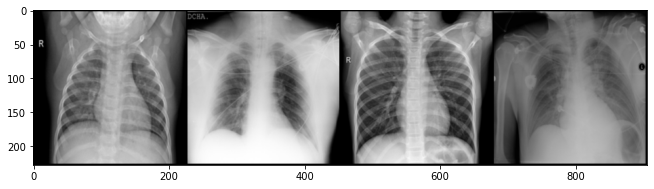

In [9]:
print('before transform')
show_img(ImageFolder(dataset_path, transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train data
actual labels: ['Viral Pneumonia', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
numerical labels: tensor([3, 1, 2, 3])


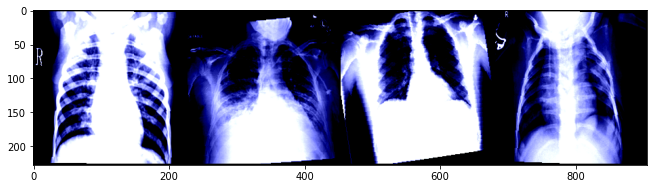

In [10]:
print('train data')
show_img(datas[0])

test data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


actual labels: ['Normal', 'Normal', 'Normal', 'COVID']
numerical labels: tensor([2, 2, 2, 0])


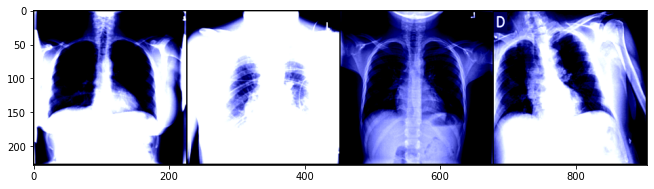

In [11]:
print('test data')
show_img(datas[2])

In [12]:
print(f'Length of Training: {len(datas[0])}')
print(f'Length of Validation: {len(datas[1])}')
print(f'Length of Testing: {len(datas[2])}')

Length of Training: 16932
Length of Validation: 2117
Length of Testing: 2116


# Model Logistic Regression

In [13]:
# Hyperparameters
RANDOM_SEED = 1
LEARNING_RATE = 0.0005
BATCH_SIZE = 64
NUM_EPOCHS = 40

# Architecture
NUM_FEATURES = 224*224
NUM_CLASSES = 4

# Other
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
GRAYSCALE = False

In [14]:
class LogisticRegression(torch.nn.Module):

    def __init__(self, num_features):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(224*224*3, 4)
        
    def forward(self, x):
        logits = self.linear(x.view(-1, 3*224*224))
        probas = F.sigmoid(logits)
        return probas

In [15]:
torch.manual_seed(RANDOM_SEED)

model = LogisticRegression(NUM_CLASSES)
model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(num_epochs = NUM_EPOCHS, model = model, 
                                                                optimizer = optimizer, device = DEVICE, 
                                                                train_loader = train_loader, valid_loader=valid_loader, 
                                                                test_loader = test_loader, logging_interval=50)

Epoch: 001/040 | Batch 0000/0265 | Loss: 1.3938
Epoch: 001/040 | Batch 0050/0265 | Loss: 1.2138
Epoch: 001/040 | Batch 0100/0265 | Loss: 1.1341
Epoch: 001/040 | Batch 0150/0265 | Loss: 1.2200
Epoch: 001/040 | Batch 0200/0265 | Loss: 1.1463
Epoch: 001/040 | Batch 0250/0265 | Loss: 1.1038
Epoch: 001/040 | Train: 56.17% | Validation: 55.13%
Time elapsed: 2.68 min
Epoch: 002/040 | Batch 0000/0265 | Loss: 1.3060
Epoch: 002/040 | Batch 0050/0265 | Loss: 1.1554
Epoch: 002/040 | Batch 0100/0265 | Loss: 1.1382
Epoch: 002/040 | Batch 0150/0265 | Loss: 1.2632
Epoch: 002/040 | Batch 0200/0265 | Loss: 1.1060
Epoch: 002/040 | Batch 0250/0265 | Loss: 1.0872
Epoch: 002/040 | Train: 55.79% | Validation: 55.79%
Time elapsed: 5.37 min
Epoch: 003/040 | Batch 0000/0265 | Loss: 1.1473
Epoch: 003/040 | Batch 0050/0265 | Loss: 1.1229
Epoch: 003/040 | Batch 0100/0265 | Loss: 1.2710
Epoch: 003/040 | Batch 0150/0265 | Loss: 1.1432
Epoch: 003/040 | Batch 0200/0265 | Loss: 1.2415
Epoch: 003/040 | Batch 0250/0265 |

# Evaluation: Logistic Regression

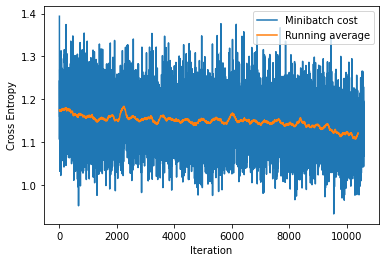

In [18]:
plt.plot(minibatch_loss_list, label='Minibatch cost')
plt.plot(np.convolve(minibatch_loss_list, 
                     np.ones(200,)/200, mode='valid'), 
         label='Running average')

plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.legend()
plt.show()

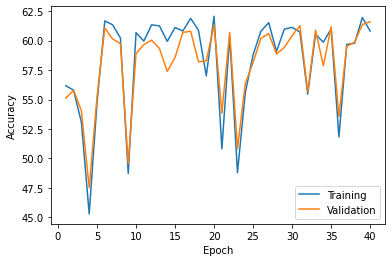

In [17]:
plt.plot(np.arange(1, NUM_EPOCHS+1), train_acc_list, label='Training')
plt.plot(np.arange(1, NUM_EPOCHS+1), valid_acc_list, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

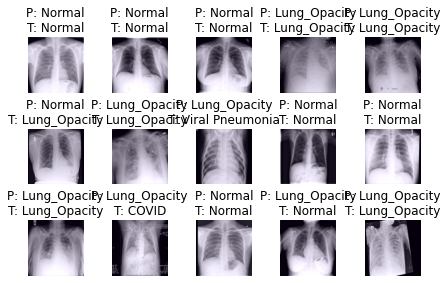

In [22]:
model.cpu()
unnormalizer = UnNormalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.2255))
class_dict  = {0: 'COVID', 1: 'Lung_Opacity', 2: 'Normal', 3: 'Viral Pneumonia'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

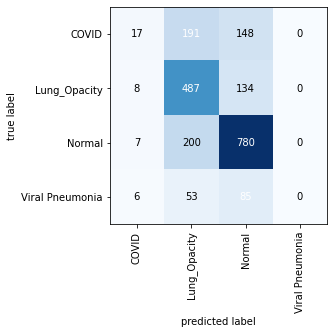

In [23]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()